In [219]:
##Import and store the data in a data frame.
import pandas as pd
import numpy as np
df = pd.read_table("airq402.dat.txt", sep="\s+")
old_names = ['CAK', 'ATL', '114.47','528', '424.56', 'FL','70.19','111.03','FL.1','70.19.1', '111.03.1'] 
new_names = ['City1', 'City2', 'Average Fare ', 'Distance ', 'Average weekly passengers','market leading airline','market share','Average fare1','Low price airline ','market share1','price']
df.rename(columns=dict(zip(old_names, new_names)), inplace=True)
df = pd.DataFrame(data=df, columns= ['City1', 'City2', 'Average Fare ', 'Distance ', 'Average weekly passengers','market leading airline','market share','Average fare1','Low price airline','market share1','price'])
df.head(6)


,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare1,Low price airline,market share1,price
0,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
1,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
2,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
3,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
4,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
5,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59


In [204]:
#Remove the outliers from the data
#del df["market leading airline"]
#df1 = df
df1.head(20)
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1_out.head(4)

,Average Fare,Distance,Average weekly passengers,market share,Average fare1,market share1,price
0,122.47,860,276.84,75.10,123.09,17.23,118.94
1,214.42,852,215.76,78.89,223.98,2.77,167.12
2,69.40,288,606.84,96.97,68.86,96.97,68.86
3,158.13,723,313.04,39.79,161.36,15.34,145.42


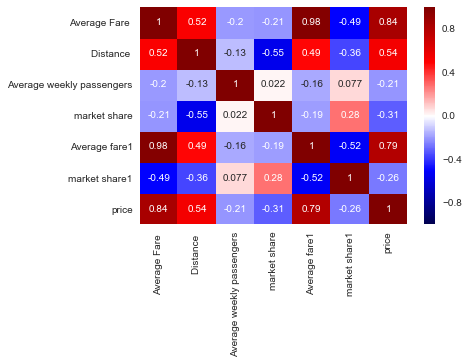

In [199]:
#Drop the independent variables which has less than 0.1 correlation with the dependent variable
import seaborn as sns
%matplotlib inline
sns.heatmap(df1_out.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


In [200]:
##Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable and split the table. 
X = df1_out.iloc[:,1:7].values
y = df1_out.iloc[:,0].values
X = pd.DataFrame(data=X,columns= ['Distance', 'Average weekly passengers','market share','Average fare1','market share1','price'])
y = pd.DataFrame(data=y,columns=['Average fare'])


In [177]:
df1_out.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare1,market share1,price
Average Fare,1.000000,0.522229,-0.197354,-0.207560,0.979692,-0.492878,0.840888
Distance,0.522229,1.000000,-0.129901,-0.547777,0.489261,-0.360774,0.539577
Average weekly passengers,-0.197354,-0.129901,1.000000,0.021900,-0.164077,0.076594,-0.209279
market share,-0.207560,-0.547777,0.021900,1.000000,-0.192970,0.280760,-0.314283
Average fare1,0.979692,0.489261,-0.164077,-0.192970,1.000000,-0.518783,0.794015
market share1,-0.492878,-0.360774,0.076594,0.280760,-0.518783,1.000000,-0.260147
price,0.840888,0.539577,-0.209279,-0.314283,0.794015,-0.260147,1.000000


In [201]:
X.drop(['Average weekly passengers','market share','market share1'],inplace = True, axis='columns')
X.head(6)

,Distance,Average fare1,price
0,860.0,123.09,118.94
1,852.0,223.98,167.12
2,288.0,68.86,68.86
3,723.0,161.36,145.42
4,1204.0,137.97,127.69
5,2237.0,148.59,148.59


In [ ]:
## Scatter Plot
sns.pairplot(df1_out[['Distance',  'Average fare1', 'price','Average Fare']], diag_kind = 'kde')

In [207]:
##Divide the data set into training and test data set and build a Multiple Linear Regression model.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [210]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
fitted1 =model.fit()

In [211]:
##Print the coefficients & intercepts of the linear regression model 
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Average fare   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.867e+04
Date:                Sun, 06 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:43:32   Log-Likelihood:                -2524.4
No. Observations:                 707   AIC:                             5055.
Df Residuals:                     704   BIC:                             5068.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Distance          0.0013      0.001      2.062      0.040    6.22e-05       0.003
Average fare1     0.7705      0.010     78.624      0.000       0.751       0.790
price             0.2350      0.012     19.738      0.000       0.212       0.258
==============================================================================
Omnibus:                       75.037   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.947
Skew:                           0.303   Prob(JB):                     2.57e-84
Kurtosis:                       6.564   Cond. No.                         56.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""